In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

### Amostra Imagem Kitti

In [24]:
path='/home/falreis/Me/mestrado/segmentation-eval/code/datasets/Kitti/data_road/training/gt_image_2/'

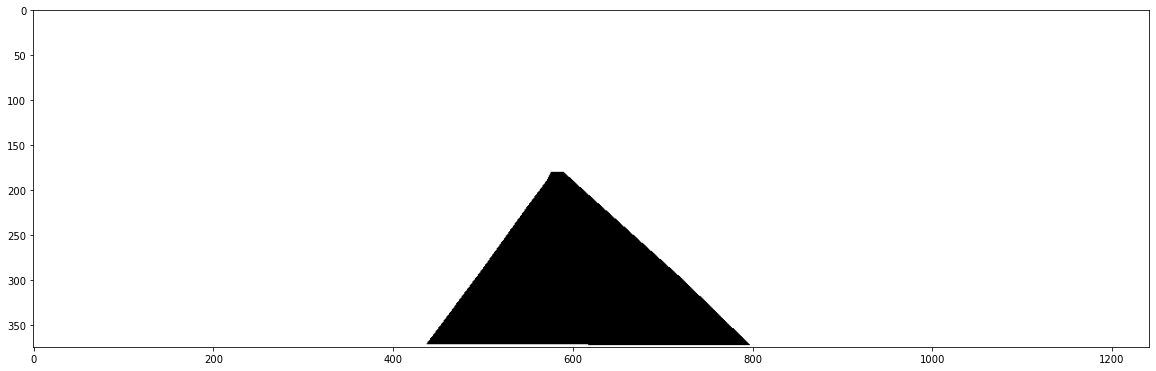

In [25]:
img = cv2.imread(path + 'um_lane_000001.png') 
img2 = img[:,:,0]

fig = plt.figure(figsize=(20,10))
plt.imshow(img2, cmap=plt.cm.binary)

### Mapas de Cores Classes Kitti

Percentual pixels rodovia: 0.08060486481905248
Percentual pixels rodovia: 0.16222789501935192
Percentual pixels rodovia: 0.23407675791733754
Percentual pixels rodovia: 0.13683120269041588


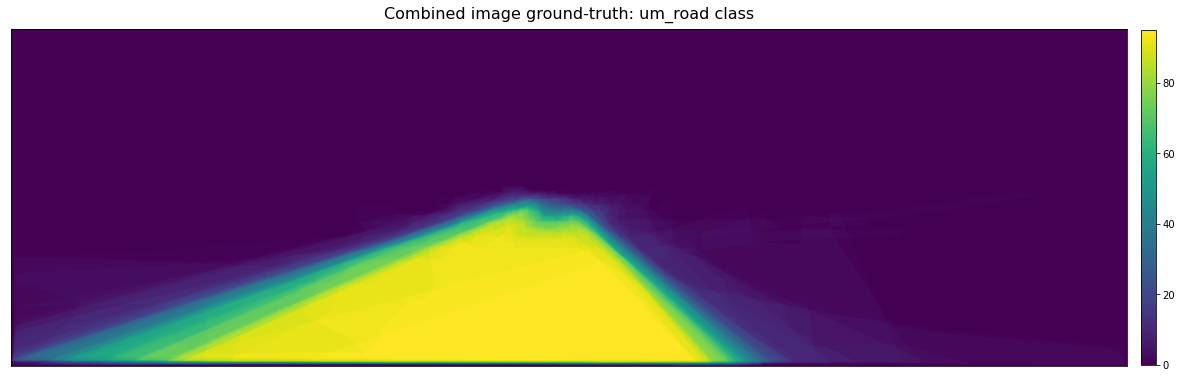

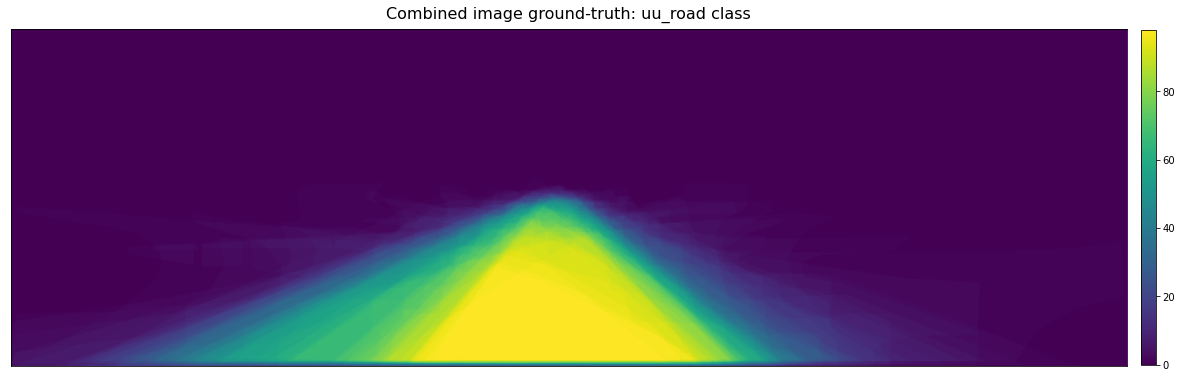

In [46]:
h=375
w=1242

for categ in ['um_lane', 'um_road', 'umm_road', 'uu_road']:
    images = glob.glob("{}{}*.png".format(path, categ))
    images.sort()
    soma = np.zeros((h, w))
    estat = 0

    for im_path in images:
        img = cv2.imread(im_path)

        if(img.shape[0] != h):
            img = cv2.resize(img, (w,h), interpolation=cv2.INTER_CUBIC)
            
        norm = img[:,:,0] / 255
        soma += norm
        estat += np.sum([norm[:,:] > 0]) / (h*w) #percentual pixels rodovia
    
    #imprime estatística pixels
    print('Percentual pixels rodovia:', estat/len(images))
    
    #plota gráficos
    fig = plt.figure(figsize=(20,10))
    plt.imshow(soma, cmap=plt.cm.viridis)
    plt.xticks([])
    plt.yticks([])
    plt.title('Combined image ground-truth: {} class'.format(categ), fontsize = 16, pad=10)
    
    cax = fig.add_axes([0.91, 0.27, 0.01, 0.465])
    plt.colorbar(spacing='uniform', cax=cax)    